# **Logistic Regression**

Logistic regression is a statistical method used for modeling binary outcomes. Unlike linear regression, which predicts continuous outputs, logistic regression predicts the probability that an instance belongs to a particular category.

## **Mathematical Expression**

The logistic regression model predicts the probability p as:

$$ p = \frac{1}{1 + e^{-(w_0+w_1x_1+w_2x_2+\ldots+w_nx_n)}} $$




Where:
- $p$ is the probability of the dependent event occurring.
- $x_1, x_2, \ldots, x_n$ are the input features.
- $w_0, w_1, \ldots, w_n$ are the weights (or coefficients) assigned to the input features.
- $e$ is the base of the natural logarithm.

## **Loss Function**

Logistic regression typically uses the binary cross-entropy loss (or log loss) as its loss function:
$$ L(y, p) = -y \log(p) - (1-y) \log(1-p) $$

Where:
- $y$ is the actual label (0 or 1).
- $p$ is the predicted probability.

## **Why Not Linear Regression for Classification?**

While linear regression predicts continuous values, classification involves predicting discrete classes. If we use linear regression for classification:
- The predicted values can go beyond [0,1], which is not meaningful for probabilities.
- The predicted values may not differentiate well between classes.
- Linear regression is sensitive to outliers, which can significantly affect the class boundary.

Logistic regression, on the other hand, ensures that the predictions are within [0,1] and provides a clear probabilistic interpretation, making it more suited for binary classification problems.


### **Import Necessary Libraries**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset From Kaggle** https://www.kaggle.com/c/titanic/data

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jadavandana","key":"9eeed7223f160af876e48a20527332ab"}'}

In [3]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 86.4MB/s]


### **Unzip Data File**

In [7]:
!mkdir train
!unzip titanic.zip -d titanic

mkdir: cannot create directory ‘train’: File exists
Archive:  titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       


### **Read the Data into DataFrame**

In [47]:
df = pd.read_csv("./titanic/train.csv")

### **Data Preprocessing**

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.shape

(891, 12)

In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
df['Survived'].nunique()

2

In [52]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### **Handling Null Values**

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
#Filling missing values
from scipy import stats
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [83]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [84]:
df['Pclass'] = df['Pclass'].apply(str)

### **Exploratory Data Analysis(EDA)**

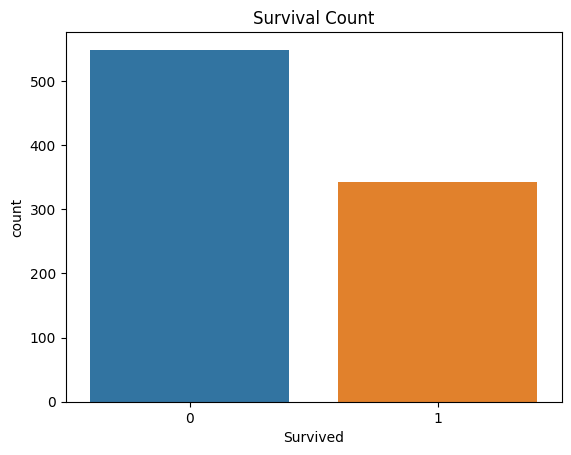

In [79]:
#Visualize the count of passengers who survived versus those who didn't.
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


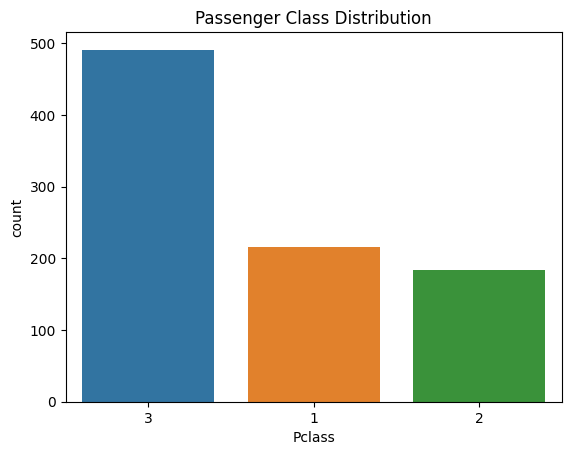

In [78]:
#distribution of passengers among different classes
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()


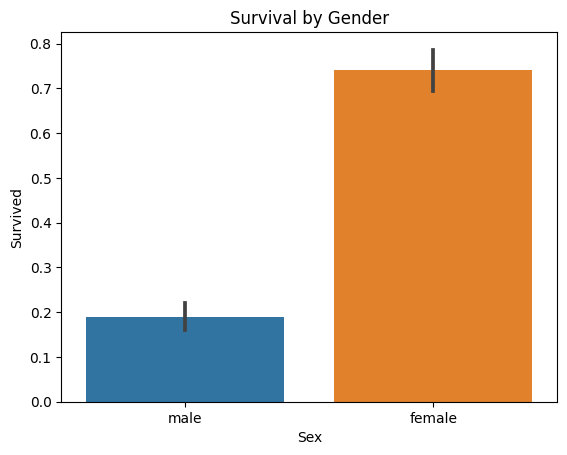

In [75]:
#Analyze the survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival by Gender')
plt.show()


In [77]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

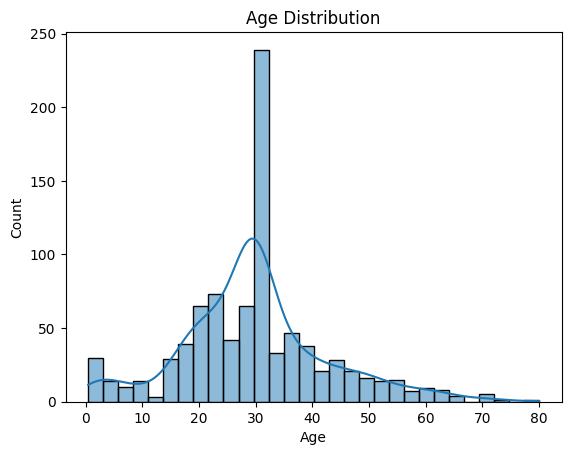

In [74]:
#distribution of ages
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()


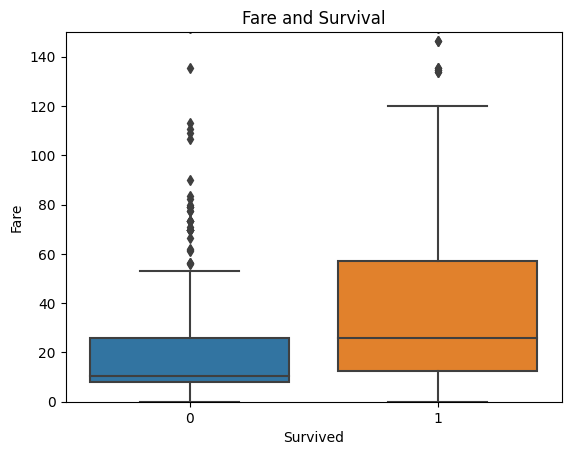

In [73]:
#correlation between fare and survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare and Survival')
plt.ylim(0, 150)  # Limiting y-axis for better clarity
plt.show()


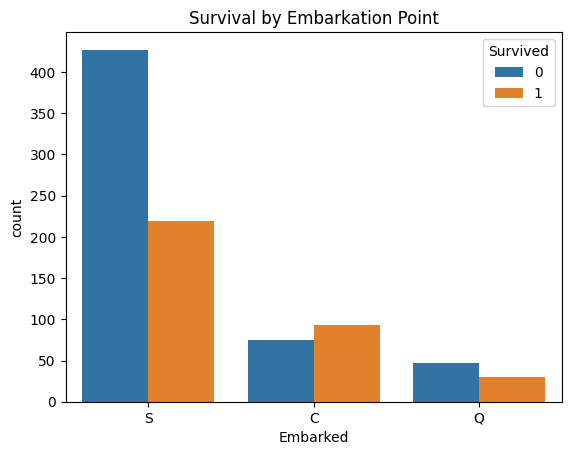

In [69]:
#Impact of Embarkation on survival
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Point')
plt.show()


<ipython-input-72-f9b7e36a6d42>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


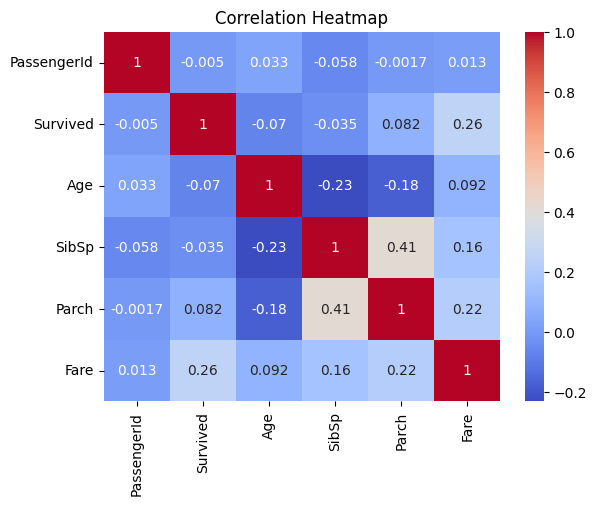

In [72]:
#heatmap showing correlation between different numerical features
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


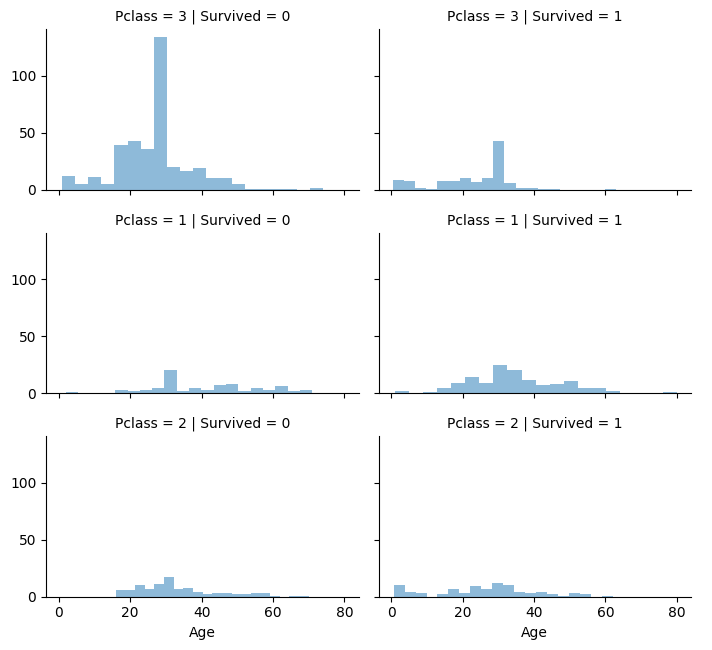

In [71]:
#Analyze how age and class together impacted survival
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()


### **Handling Categorical Features**

In [85]:
df = pd.get_dummies(df, columns=['Pclass','Sex', 'Cabin', 'Embarked'], drop_first=True)

In [86]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,...,0,0,0,0,0,0,0,0,0,1


In [87]:
X = df.iloc[:,3:]
y = df.iloc[:,1]

In [97]:
X.drop('Ticket',axis=1,inplace=True)

In [98]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### **Split the data**

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### **Model Training**

In [100]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **Model Evaluation**

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
predictions = classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.82      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

[[98 12]
 [16 53]]


## **Confusion Matrix**

A confusion matrix is a table often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows easy identification of confusion between classes (i.e., how many instances of class A are classified as class B and vice versa).

The structure of a confusion matrix for a binary classification problem can be visualized as follows:

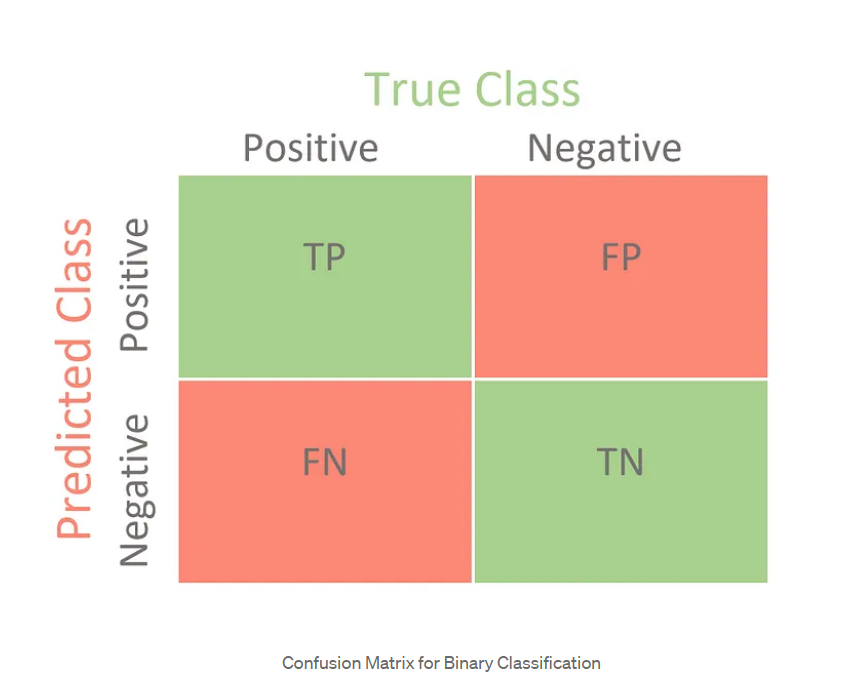



**True Positive (TP):** These are cases in which we predicted yes (they have the condition), and they do have the condition.

**True Negative (TN):** We predicted no, and they don't have the condition.

**False Positive (FP):** We predicted yes, but they don't actually have the condition (also known as a "Type I error").

**False Negative (FN):** We predicted no, but they actually do have the condition (also known as a "Type II error").

From the confusion matrix, we can calculate various performance metrics like accuracy, precision, recall, and F1-score:

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

The confusion matrix provides a more complete picture of how a classifier is performing and also allows the calculation of various other metrics that can provide insight into the performance of the model.


### **ROC**

In [109]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [105]:
roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

0.8727272727272727

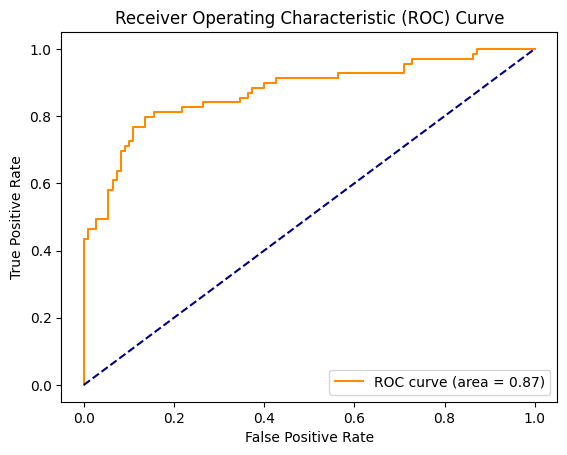

In [111]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### **ROC Explanation**

### **Receiver Operating Characteristic (ROC)**

#### **Overview:**
The ROC curve is a graphical representation that illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is one of the most important evaluation metrics for checking any classification model’s performance.

#### **Components:**
- **True Positive Rate (TPR)**: Also known as Sensitivity or Recall, TPR measures the proportion of actual positives that are correctly identified as such. Mathematically, it's given by:

  $$ \text{TPR} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}} $$


- **False Positive Rate (FPR)**: It measures the proportion of actual negatives that are incorrectly identified as positives. It's calculated as:
  $$ \text{FPR} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP) + True Negatives (TN)}} $$

#### **Plotting the ROC Curve:**
On the ROC curve, the True Positive Rate (Sensitivity) is plotted on the Y-axis, while the False Positive Rate (1 - Specificity) is plotted on the X-axis. An ROC curve plots TPR vs. FPR at different classification thresholds.

#### **Interpretation:**
- **Perfect Classifier**: If the curve passes through the top-left corner, meaning the TPR is 1 and FPR is 0, it indicates a perfect classifier.
- **Random Classifier**: A classifier with no discriminating ability will have its ROC curve as a diagonal line from the bottom-left corner to the top-right corner. This is essentially a random classifier.
- **Area Under the Curve (AUC)**: One of the most important aspects of the ROC curve is the AUC, which is the area underneath the ROC curve. It provides an aggregate measure of the model's performance across all classification thresholds. A model whose predictions are 100% correct has an AUC of 1, whereas a model whose predictions are 100% wrong has an AUC of 0.

#### **Benefits:**
The ROC curve and the AUC score give us a holistic view of the model's performance, especially when the classes are imbalanced. It's particularly useful to compare the performance of different models on the same dataset.

In conclusion, the ROC curve is an essential tool for understanding the trade-offs between sensitivity (or recall) and specificity in different settings of the threshold and can help in deciding the optimal threshold for making decisions.
